# Gradient Boosting; just to try from scratch on our own data

In [1]:
import  numpy as np
import pandas as pd

In [32]:
import random
np.random.seed(42)
X = np.random.rand(1000, 1) - 0.5
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(1000)

# Create a dataset with a quadratic relationship

In [33]:
print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (1000, 1)
y shape: (1000,)


In [34]:
# Convert to DataFrame for easier manipulation
data = pd.DataFrame()

In [35]:
data["X"] = X[:, 0]
data["Y"] = y


In [36]:
print(data.head())

          X         Y
0 -0.125460  0.056106
1  0.450714  0.542663
2  0.231994  0.180473
3  0.098658  0.059730
4 -0.343981  0.382959


Text(0.5, 1.0, 'Scatter plot of X vs Y')

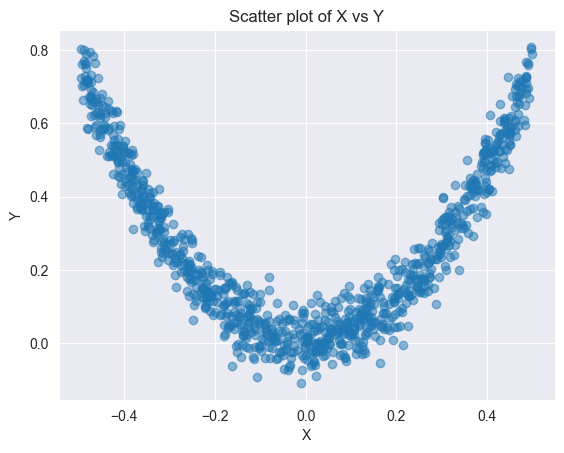

In [37]:
# here i want to plot the data
import matplotlib.pyplot as plt

plt.scatter(data["X"], data["Y"], alpha=0.5)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Scatter plot of X vs Y")

In [38]:
data["pred1"] = data["Y"].mean()



In [39]:
print(data.head())

          X         Y     pred1
0 -0.125460  0.056106  0.261006
1  0.450714  0.542663  0.261006
2  0.231994  0.180473  0.261006
3  0.098658  0.059730  0.261006
4 -0.343981  0.382959  0.261006


In [40]:
# Calculate the residuals
data["res1"] = data["Y"] - data["pred1"]


In [41]:
print(data.head())

          X         Y     pred1      res1
0 -0.125460  0.056106  0.261006 -0.204901
1  0.450714  0.542663  0.261006  0.281657
2  0.231994  0.180473  0.261006 -0.080533
3  0.098658  0.059730  0.261006 -0.201277
4 -0.343981  0.382959  0.261006  0.121953


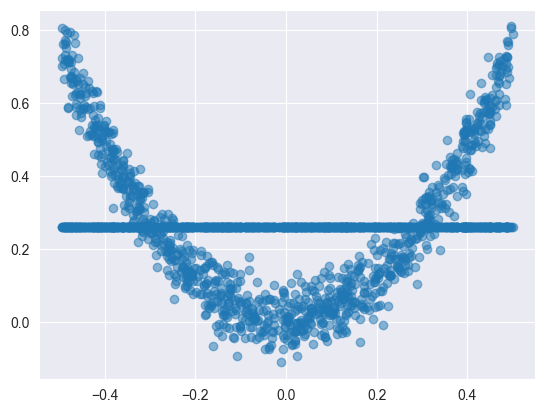

In [42]:
plt.scatter(data["X"], data["pred1"], alpha=0.5)
plt.plot(data["X"], data["Y"], 'o', alpha=0.5, label='Data')

In [43]:
# now apply decision tree
from sklearn.tree import DecisionTreeRegressor
# Create a decision tree regressor
tre = DecisionTreeRegressor(max_depth=12)

tre.fit(data["X"].values.reshape(-1, 1), data["res1"])


DecisionTreeRegressor(max_depth=12)

In [47]:
# plot the tree
"""from sklearn.tree import plot_tree
plt.figure(figsize=(12, 8))
plot_tree(tre, filled=True, feature_names=["X"], fontsize=10)
# Predict using the decision tree
pred_tree = tre.predict(data["X"].values.reshape(-1, 1))
"""

# actually the tree is very large so i cant plot it here 


'from sklearn.tree import plot_tree\nplt.figure(figsize=(12, 8))\nplot_tree(tre, filled=True, feature_names=["X"], fontsize=10)\n# Predict using the decision tree\npred_tree = tre.predict(data["X"].values.reshape(-1, 1))\n'

In [52]:
# generating x_test
x_test = np.linspace(-0.5, 0.5, 1000).reshape(-1, 1)

# Predict using the decision tree
y_pred = 0.265458 + tre.predict(x_test.reshape(1000, 1))

# 0.265458 is the mean of the target variable of pred1 

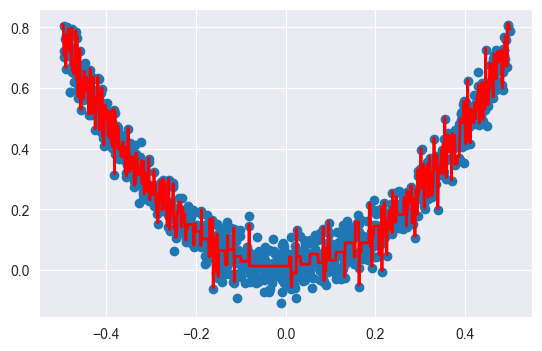

In [57]:
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.plot(x_test, y_pred, linewidth=2,color='red')
plt.scatter(data['X'],data['Y'])

In [62]:

data['pred2'] = 0.265458 + tre.predict(data['X'].values.reshape(1000,1))

In [63]:
print(data.head())

          X         Y     pred1      res1     pred2
0 -0.125460  0.056106  0.261006 -0.204901  0.067689
1  0.450714  0.542663  0.261006  0.281657  0.547115
2  0.231994  0.180473  0.261006 -0.080533  0.184925
3  0.098658  0.059730  0.261006 -0.201277  0.032113
4 -0.343981  0.382959  0.261006  0.121953  0.373403


In [68]:

data['res2'] = data['Y'] - data['pred2']



In [69]:

tree2 = DecisionTreeRegressor(max_leaf_nodes=8)
tree2.fit(data['X'].values.reshape(-1, 1), data['res2'])



DecisionTreeRegressor(max_leaf_nodes=8)

In [72]:
y_pred = 0.265458 + sum(regressor.predict(x_test.reshape(-1, 1)) for regressor in [tre,tree2])


Text(0.5, 1.0, 'X vs y')

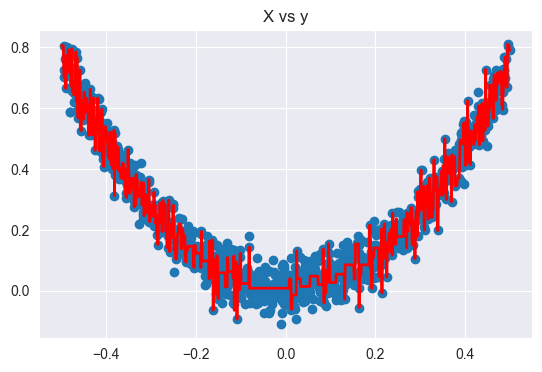

In [76]:

plt.figure(figsize=(14,4))
plt.subplot(121)
plt.plot(x_test, y_pred, linewidth=2,color='red')
plt.scatter(data['X'],data['Y'])
plt.title('X vs y')

In [77]:
def gradient_boost(X,y,number,lr,count=1,regs=[],foo=None):

  if number == 0:
    return 
  else:
    # do gradient boosting

    if count > 1:
      y = y - regs[-1].predict(X)
    else:
      foo = y

    tree_reg = DecisionTreeRegressor(max_depth=5, random_state=42)
    tree_reg.fit(X, y)

    regs.append(tree_reg)

    x1 = np.linspace(-0.5, 0.5, 500)
    y_pred = sum(lr * regressor.predict(x1.reshape(-1, 1)) for regressor in regs)

    print(number)
    plt.figure()
    plt.plot(x1, y_pred, linewidth=2)
    plt.plot(X[:, 0], foo,"r.")
    plt.show()

    gradient_boost(X,y,number-1,lr,count+1,regs,foo=foo)

5


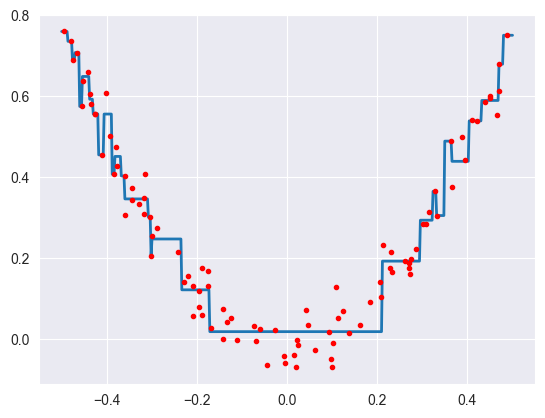

4


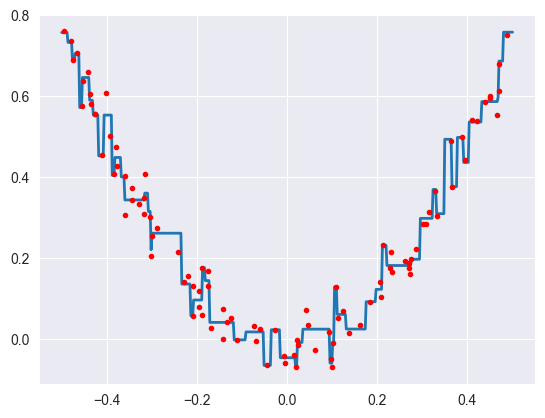

3


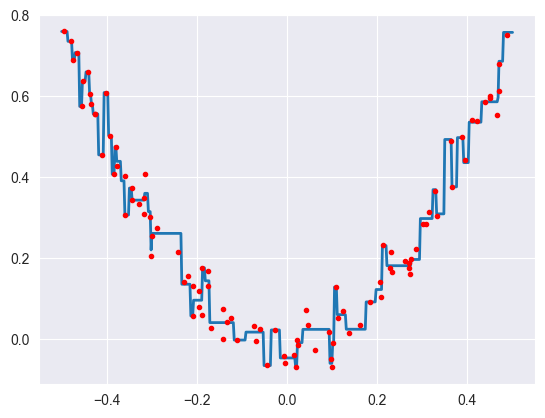

2


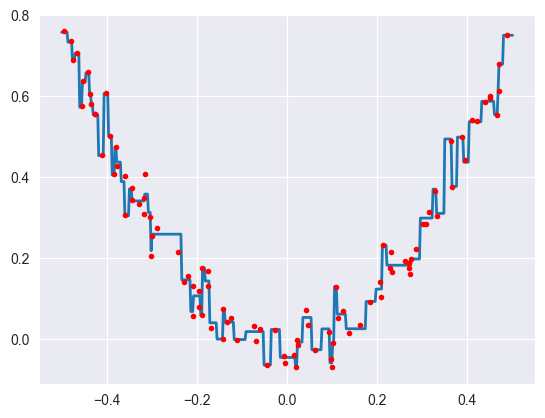

1


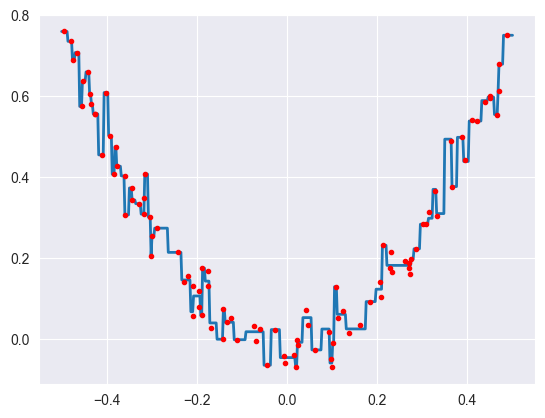

In [78]:
np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)
gradient_boost(X,y,5,lr=1)

In [79]:
# This is a simple implementation of gradient boosting from scratch
# It can be improved by adding more features like regularization, early stopping, etc.
